# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("Total_de_acao_acao.csv")

In [5]:
# df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [6]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4.0,00:00,78,73,,fim_partida,NaN
1,1,4.0,00:00,78,73,,fim_partida,NaN
2,2,4.0,00:08,78,73,CAP,RD,André
3,3,4.0,00:08,78,73,FLA,LL_Pts_T,Marcelinho
4,4,4.0,00:08,78,73,FLA,LL_Pts_C,Marcelinho
...,...,...,...,...,...,...,...,...
850433,477,1.0,10:00,0,0,MIN,substituicao_entra,Leandrinho
850434,478,1.0,10:00,0,0,MIN,substituicao_entra,Alex
850435,479,1.0,10:00,0,0,MIN,substituicao_entra,Davi
850436,480,1.0,10:00,0,0,MIN,substituicao_entra,Tyrone


In [7]:
# mudança do tempo
# colocar todos em segundos para facilitar a vida
# primeiro evitar NAN (acredite!!! tem isso no site)
df.dropna(subset=['Tempo'], inplace=True)

In [8]:
# tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
# para isso localizei o valores errados e concertei
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [9]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [10]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [11]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [12]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [13]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [14]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

In [15]:
df['dif_casa'] = df['placar_casa'] - df['placar_visitante']
df['dif_visitante'] = df['placar_visitante'] - df['placar_casa']

In [16]:
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante
0,4,2400,78,73,,fim_partida,NaN,5,-5
1,4,2400,78,73,,fim_partida,NaN,5,-5
2,4,2392,78,73,CAP,RD,André,5,-5
3,4,2392,78,73,FLA,LL_Pts_T,Marcelinho,5,-5
4,4,2392,78,73,FLA,LL_Pts_C,Marcelinho,5,-5
...,...,...,...,...,...,...,...,...,...
850433,1,0,0,0,MIN,substituicao_entra,Leandrinho,0,0
850434,1,0,0,0,MIN,substituicao_entra,Alex,0,0
850435,1,0,0,0,MIN,substituicao_entra,Davi,0,0
850436,1,0,0,0,MIN,substituicao_entra,Tyrone,0,0


In [17]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C')]

In [18]:
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante
4,4,2392,78,73,FLA,LL_Pts_C,Marcelinho,5,-5
10,4,2391,77,73,CAP,3_Pts_T,André,4,-4
12,4,2387,77,73,FLA,LL_Pts_C,Marcelinho,4,-4
13,4,2387,76,73,FLA,LL_Pts_C,Marcelinho,3,-3
19,4,2373,75,73,FLA,3_Pts_T,Marcelinho,2,-2
...,...,...,...,...,...,...,...,...,...
850411,1,114,1,5,MIN,LL_Pts_C,Scott,-4,4
850414,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5
850420,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2
850422,1,47,0,0,MIN,3_Pts_T,Davi,0,0


In [19]:
# pontuacao.to_csv('tempo2.csv')

In [20]:
# a.set_index("Tempo", inplace=True)

In [21]:
# a[['placar_casa', 'placar_visitante']].plot()

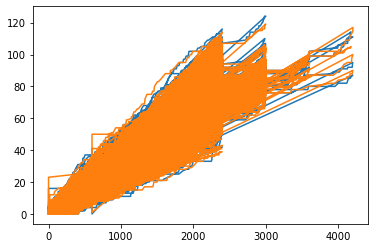

In [22]:
# plt.figure(figsize=(100,10))
fig, ax = plt.subplots()
x = pontuacao['Tempo']
y = pontuacao[['placar_casa', 'placar_visitante']]
ax.plot(x, y)

# tentar colocar uma minha vermelha entre os quartos, para separar visualmente 
#threshold = 1800
#ax.fill_between(0, 1, where=y > threshold,
#                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

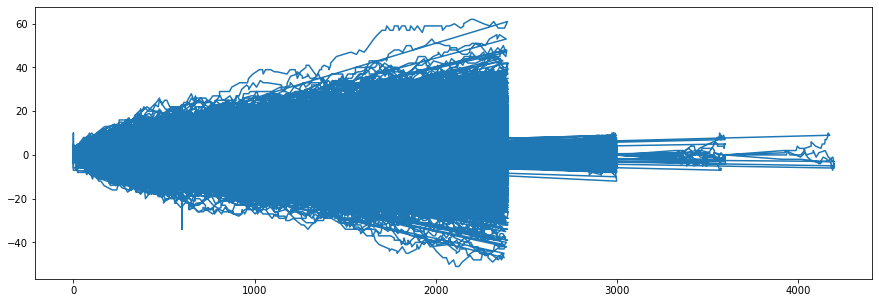

In [23]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['dif_casa'])

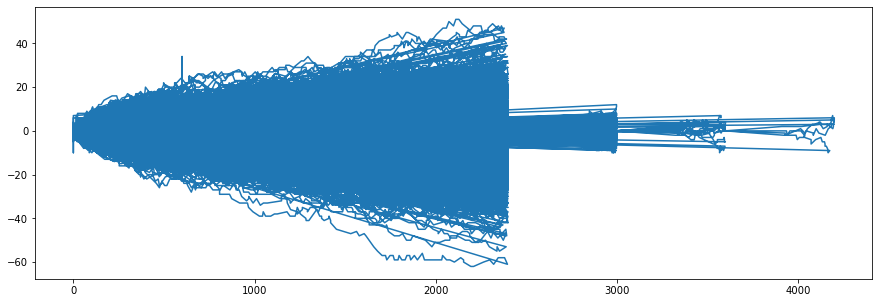

In [24]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['dif_visitante'])

In [25]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'tempo_tecnico') |
                (df['Indicador'] == 'fim_partida') | (df['Indicador'] == 'fim_quarto') |
                (df['Indicador'] == 'inicio_partida') | (df['Indicador'] == 'inicio_quarto') |
                (df['Indicador'] == 'tempo_tecnico')]

In [26]:
posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

<ipython-input-26-9d871266beab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)


In [27]:
posse_bola.to_csv('tempo2.csv')

In [28]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [29]:
valor_posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante,diferenca
1,4,2400,78,73,,fim_partida,NaN,5,-5,8.0
4,4,2392,78,73,FLA,LL_Pts_C,Marcelinho,5,-5,1.0
10,4,2391,77,73,CAP,3_Pts_T,André,4,-4,4.0
13,4,2387,76,73,FLA,LL_Pts_C,Marcelinho,3,-3,14.0
19,4,2373,75,73,FLA,3_Pts_T,Marcelinho,2,-2,24.0
...,...,...,...,...,...,...,...,...,...,...
850414,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5,38.0
850420,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2,15.0
850422,1,47,0,0,MIN,3_Pts_T,Davi,0,0,24.0
850426,1,23,0,0,FLA,3_Pts_T,Marquinhos,0,0,23.0


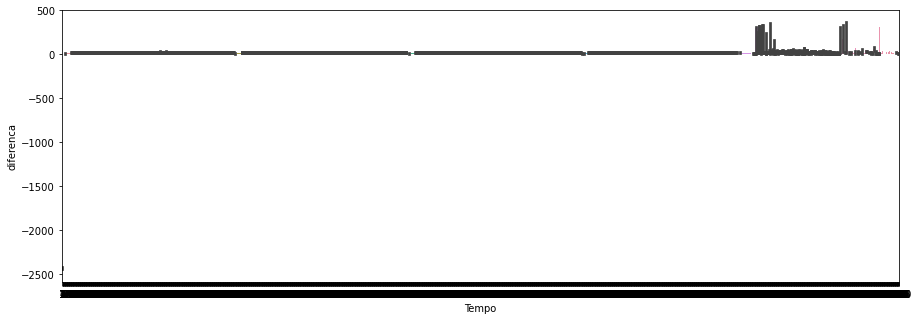

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])

In [31]:
Flamengo = df.query("Time == 'FLA'")

In [32]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [33]:
placar_flamengo

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante
4,4,2392,78,73,FLA,LL_Pts_C,Marcelinho,5,-5
12,4,2387,77,73,FLA,LL_Pts_C,Marcelinho,4,-4
13,4,2387,76,73,FLA,LL_Pts_C,Marcelinho,3,-3
19,4,2373,75,73,FLA,3_Pts_T,Marcelinho,2,-2
22,4,2333,75,73,FLA,LL_Pts_C,Laprovittola,2,-2
...,...,...,...,...,...,...,...,...,...
850401,1,153,4,8,FLA,LL_Pts_C,Olivinha,-4,4
850404,1,153,4,7,FLA,2_Pts_C,Olivinha,-3,3
850414,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5
850420,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2


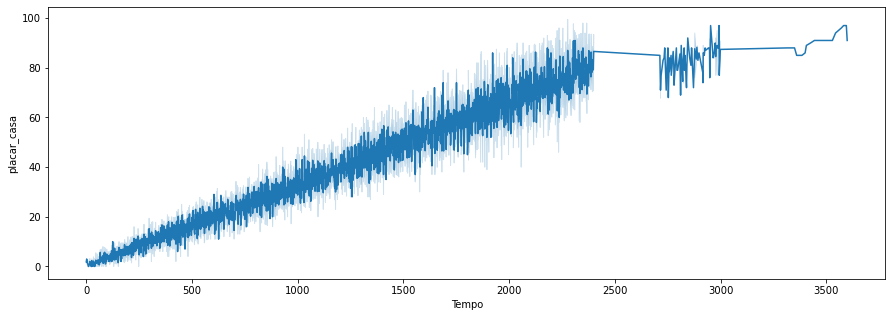

In [34]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_casa")

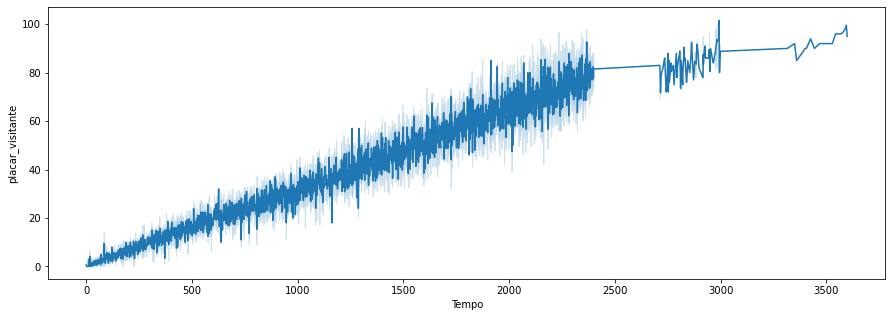

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_visitante")

In [49]:
Flamengo = df.query("Time == 'FLA'").sort_values(by=['Tempo'])

In [54]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [55]:
placar_flamengo.set_index("Tempo", inplace=True)

In [56]:
placar_flamengo_valor = placar_flamengo['placar_casa']

In [57]:
placar_flamengo_valor

Tempo
0        4
0        1
0        2
0        2
0        2
        ..
3589    97
3589    97
3595    97
3595    97
3599    91
Name: placar_casa, Length: 14257, dtype: int64

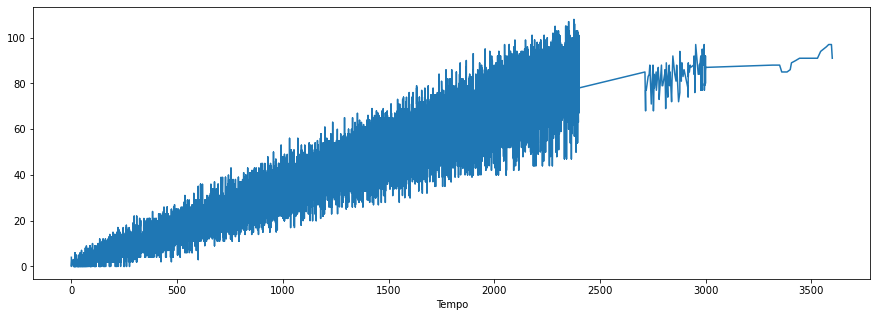

In [58]:
plt.figure(figsize=(15,5))
flamengo_media_movel = placar_flamengo_valor.plot()

In [59]:
flamengo_media_movel = placar_flamengo_valor.rolling(window=10).mean()

In [60]:
flamengo_media_movel

Tempo
0        NaN
0        NaN
0        NaN
0        NaN
0        NaN
        ... 
3589    92.7
3589    93.5
3595    94.2
3595    94.8
3599    94.8
Name: placar_casa, Length: 14257, dtype: float64

In [61]:
flamengo_dev_pad = placar_flamengo_valor.rolling(window=10).std()

In [62]:
flamengo_dev_pad

Tempo
0            NaN
0            NaN
0            NaN
0            NaN
0            NaN
          ...   
3589    3.020302
3589    2.990726
3595    2.898275
3595    2.780887
3599    2.780887
Name: placar_casa, Length: 14257, dtype: float64

In [63]:
under_line = (flamengo_media_movel-flamengo_dev_pad)
over_line = (flamengo_media_movel+flamengo_dev_pad)

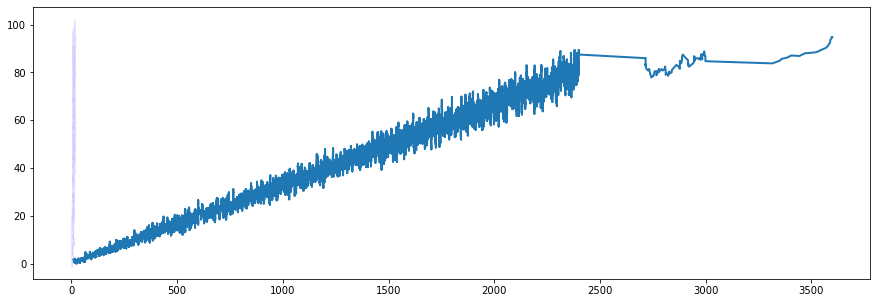

In [64]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2)
plt.fill_between(flamengo_dev_pad, under_line, over_line, color='b', alpha=.1) #std curves.

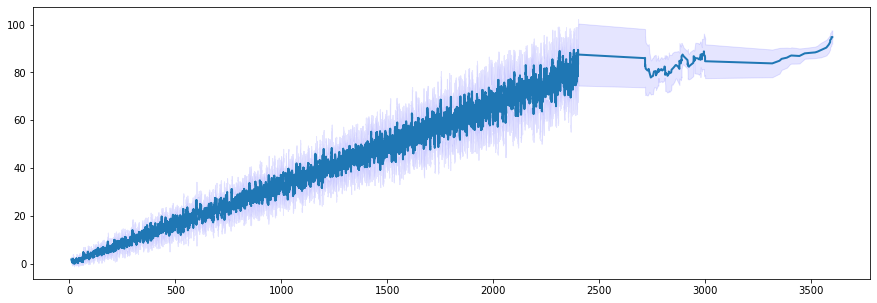

In [66]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2) #mean curve.
plt.fill_between(flamengo_dev_pad.index, under_line, over_line, color='b', alpha=.1) #std curves.